电信行业在竞争日益激烈的当下，如何挽留用户成为一项关键业务指标。本案例将通过各种维度分析用户流失的原因，预测用户流失，挽留重要用户。

各特征含义如下：

customerID 用户id；

gender 性别；

gender 是否时老年人；

Partner 是否有配偶；

Dependents 是否经济独立；

tenure 客户职位；

PhoneService 是否开通了电话服务业务；

MultipleLines：是否开通了多线服务；

InternetService：是否开通了互联网服务；

OnlineSecurity：是否了开通网络安全服务；

OnlineBackup 是否开通了在线备份业务；

DeviceProtection 是否开通了设备保护业务；

TechSupport 是否开通了技术支持服务；

StreamingTV 是否开通了网络电视；

StreamingMovies：是否开通了网络电影；

Contract 签订合同的方式（按年、月）；

PaperlessBilling：是否开通了电子账单；

PaymentMethod 支付方式；

MonthlyCharges 月费用；

TotalCharges 总费用；

Churn 目标变量，客户是否流失

In [192]:
#导入相关包
import pandas as pd
import numpy as np

In [193]:
# 读入数据
data = pd.read_csv('E:/customerInfo.csv')

In [194]:
# 预览数据
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [195]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [197]:
# TotalCharges 存在11条缺失值,占样本总量的比例较小，故删除
data.dropna(inplace = True)

In [198]:
data.shape

(7032, 21)

In [199]:
#TotalCharges转换为数字类型
data['TotalCharges'] = data['TotalCharges'].astype(np.float)

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

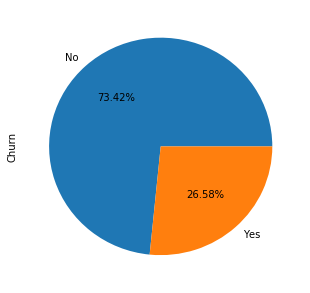

In [201]:
# 流失与未流失客户占比
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
data.Churn.value_counts().plot.pie(autopct = '%1.2f%%')
plt.show()

可以看出，流失用户占比26.58%，未流失用户占比73.42%

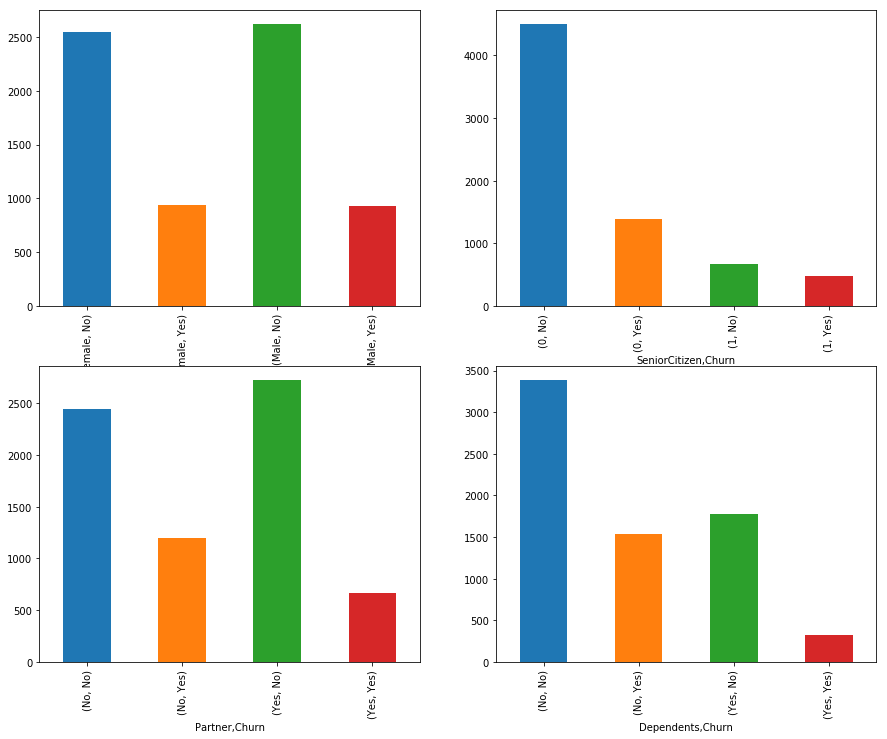

In [202]:
#客户的个人信息与流失的关系
plt.figure(figsize = (15,12))

plt.subplot(221)

data.groupby(['gender','Churn'])['Churn'].count().plot.bar()

plt.subplot(222)
data.groupby(['SeniorCitizen','Churn'])['Churn'].count().plot.bar()

plt.subplot(223)
data.groupby(['Partner','Churn'])['Churn'].count().plot.bar()
    
plt.subplot(224)
data.groupby(['Dependents','Churn'])['Churn'].count().plot.bar()

流失与非流失客户中男女比例差异不大，所以性别对于客户是否流失无显著影响；可以看出，老年人、无配偶或经济不独立的情况下客户流失率均较高

客户所从事的职业类型种类：72


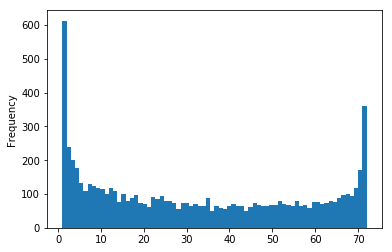

In [203]:
print('客户所从事的职业类型种类：%d'%data.tenure.unique().shape)
data.tenure.plot.hist(bins = 72)

由于数据做了脱敏处理，看不差具体职业是什么，从图中可以看出职业在1到10和70左右人数较多，其他分布较为平均

In [204]:
# 分类变量的取值分布
cols = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

for col in cols:
    print(data[col].value_counts())
    print('*'*40)

Yes    6352
No      680
Name: PhoneService, dtype: int64
****************************************
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
****************************************
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
****************************************
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
****************************************
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
****************************************
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
****************************************
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
*******************

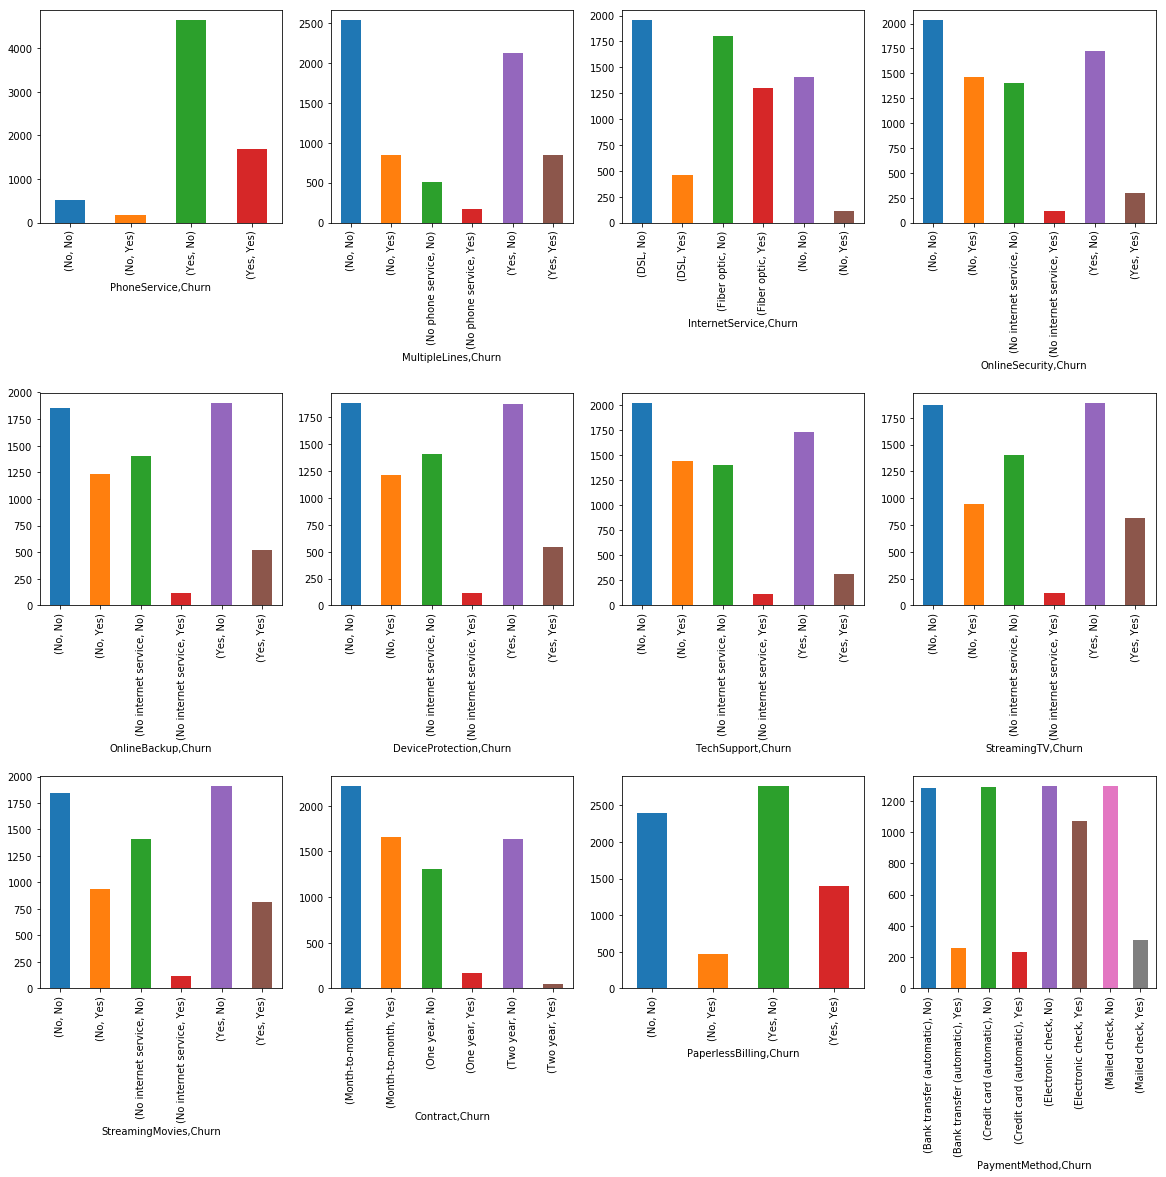

In [205]:
# 业务开通状态与客户是否流失之间的关系
plt.figure(figsize = (20,18))
plt.subplot(3,4,1)
data.groupby(['PhoneService','Churn']).size().plot.bar()
plt.subplot(3,4,2)
data.groupby(['MultipleLines','Churn']).size().plot.bar()
plt.subplot(3,4,3)
data.groupby(['InternetService','Churn']).size().plot.bar()
plt.subplot(3,4,4)
data.groupby(['OnlineSecurity','Churn']).size().plot.bar()
plt.subplot(3,4,5)
data.groupby(['OnlineBackup','Churn']).size().plot.bar()
plt.subplot(3,4,6)
data.groupby(['DeviceProtection','Churn']).size().plot.bar()
plt.subplot(3,4,7)
data.groupby(['TechSupport','Churn']).size().plot.bar()
plt.subplot(3,4,8)
data.groupby(['StreamingTV','Churn']).size().plot.bar()
plt.subplot(3,4,9)
data.groupby(['StreamingMovies','Churn']).size().plot.bar()
plt.subplot(3,4,10)
data.groupby(['Contract','Churn']).size().plot.bar()
plt.subplot(3,4,11)
data.groupby(['PaperlessBilling','Churn']).size().plot.bar()
plt.subplot(3,4,12)
data.groupby(['PaymentMethod','Churn']).size().plot.bar()
plt.subplots_adjust(wspace =0.2, hspace =0.8)

可以得到结论，InternetService的状态为Fiber optic、未开通OnlineSecurity、OnlineBackup、DeviceProtection服务、按月签订合同、开通了电子账单、付款方式为Electronic check的客户流失率较高；
'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'中状态为'No internet service'的流失比例大致相同

In [206]:
# 目标变量流失客户转换为1，未流失客户转换为0
data['Churn'][data['Churn'] == 'No'] = 0
data['Churn'][data['Churn'] == 'Yes'] = 1

E:\Anaconda3-5.2.0-Windows-x86_64\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda3-5.2.0-Windows-x86_64\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [207]:
# ID类特征无用，故删除
data.drop('customerID',1,inplace = True)

In [208]:
# 重建索引
data = data.reset_index(drop = True)

In [209]:
# 将标称型特征映射为数值型
data_temp1 = data.loc[:,['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']]
data_fact = data_temp1.apply(lambda x:pd.factorize(x)[0])

In [210]:
data.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


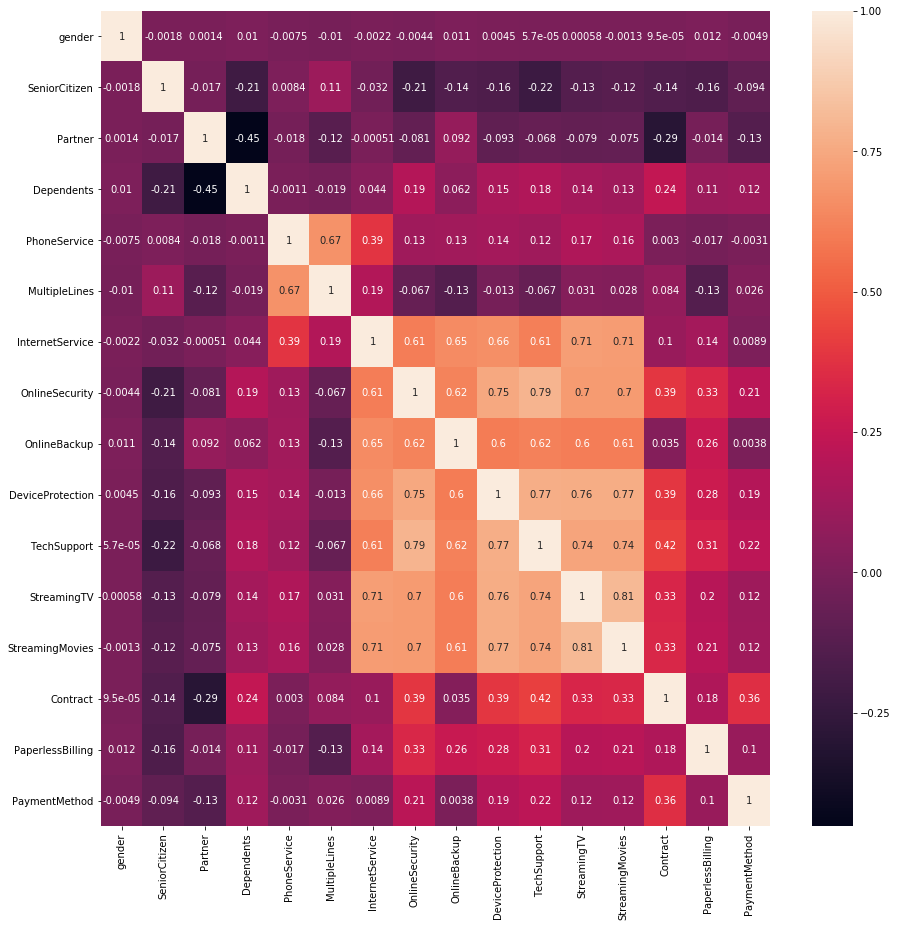

In [211]:
#特征之间的相关性
import seaborn as sns
plt.figure(figsize = (15,15))
sns.heatmap(data_fact.corr(),annot = True)

'InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies'之间相关度较高，具有一定共线性，此处只保留其中一个特征

In [212]:
data.drop(['OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies'],1,inplace = True)

In [213]:
#独热编码
data_tmp2 = pd.get_dummies(data.loc[:,['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',  'Contract', 'PaperlessBilling', 'PaymentMethod']])
data_tmp3 = data[['tenure','MonthlyCharges','TotalCharges','Churn']]
data = pd.concat([data_tmp2,data_tmp3],axis = 1)

In [221]:
#量纲缩放
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data[['tenure','MonthlyCharges','TotalCharges']] = ss.fit_transform(data[['tenure','MonthlyCharges','TotalCharges']])

In [225]:
data['Churn']= data.Churn.astype(int)

In [229]:
#目标变量与特征矩阵之间的相关性，可删除与目标变量相关性较低的特征
plt.figure(figsize = (15,10))
feature_relate = data.corr()['Churn'].sort_values(ascending = False)
feature_relate

Churn                                      1.000000
Contract_Month-to-month                    0.404565
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
MultipleLines_Yes                          0.040033
PhoneService_Yes                           0.011691
gender_Female                              0.008545
gender_Male                               -0.008545
PhoneService_No                           -0.011691
MultipleLines_No phone service            -0.011691
MultipleLines_No                          -0.032654
PaymentMethod_Mailed check                -0.090773
PaymentMethod_Bank transfer (automatic)   -0.118136
InternetService_DSL                       -0.124141
PaymentMetho

<Figure size 1080x720 with 0 Axes>

In [230]:
feature_relate[np.abs(feature_relate)>0.1].index

Index(['Churn', 'Contract_Month-to-month', 'InternetService_Fiber optic',
       'PaymentMethod_Electronic check', 'MonthlyCharges',
       'PaperlessBilling_Yes', 'Dependents_No', 'SeniorCitizen', 'Partner_No',
       'PaymentMethod_Bank transfer (automatic)', 'InternetService_DSL',
       'PaymentMethod_Credit card (automatic)', 'Partner_Yes',
       'Dependents_Yes', 'Contract_One year', 'PaperlessBilling_No',
       'TotalCharges', 'InternetService_No', 'Contract_Two year', 'tenure'],
      dtype='object')

In [231]:
data = data[['Churn', 'Contract_Month-to-month', 'InternetService_Fiber optic',
       'PaymentMethod_Electronic check', 'MonthlyCharges',
       'PaperlessBilling_Yes', 'Dependents_No', 'SeniorCitizen', 'Partner_No',
       'PaymentMethod_Bank transfer (automatic)', 'InternetService_DSL',
       'PaymentMethod_Credit card (automatic)', 'Partner_Yes',
       'Dependents_Yes', 'Contract_One year', 'PaperlessBilling_No',
       'TotalCharges', 'InternetService_No', 'Contract_Two year', 'tenure']]

In [232]:
# 训练集测试集分离
from sklearn.model_selection import train_test_split
X = data.iloc[:,:-1]
Y = data.iloc[:,-1].astype(int)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [233]:
# 使用随机森林模型预测是否流失
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid_param_test = {'n_estimators':[100,1000,1200],'max_depth':[10,20,30]}
gs = GridSearchCV(estimator=RandomForestClassifier(),param_grid = grid_param_test,scoring = 'accuracy',cv = 5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 1000, 1200], 'max_depth': [10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [234]:
print(gs.best_score_)
print(gs.best_params_)

0.9402681836651767
{'max_depth': 30, 'n_estimators': 100}


In [235]:
gs.score(x_test,y_test)

0.9379146919431279

In [236]:
# 使用梯度提升树预测是否流失
from sklearn.ensemble import GradientBoostingClassifier
dbc = GradientBoostingClassifier()
grid_param_test1 = {'n_estimators':[20,30,50,80],'max_depth':[2,5,10]}
gs1 = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid = grid_param_test1,scoring = 'accuracy',cv = 5)
gs1.fit(x_train,y_train)
print(gs1.best_score_)
print(gs1.best_params_)

0.9721657862657457
{'max_depth': 5, 'n_estimators': 80}


In [237]:
gs1.score(x_test,y_test)

0.9772511848341232

易流失客户群体特征：

1、性别对于客户是否流失无显著影响；

2、老年人、无配偶或经济不独立的人群流失率较高；

3、付款方式为Electronic check的客户流失率较高；

4、签订合同越久，留存率越高；

5、无互联网服务的情况对流失率不产生显著影响；

6、提供的各项网络服务项目能够降低客户的流失率。

针对以上结论，可以推荐老年用户与青少年用户开通网络服务，并以提供优惠等营销手段签订两年合同，增加对各项网络服务项目的推广，同时考虑改善电子账单支付的用户体验。